In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cnx = sqlite3.connect('database.sqlite1')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
df.shape  

(183978, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [6]:
df.isnull().sum().head()

id                      0
player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating        836
dtype: int64

In [7]:
df= df.dropna()

In [8]:
df.isnull().sum().head()

id                    0
player_fifa_api_id    0
player_api_id         0
date                  0
overall_rating        0
dtype: int64

In [9]:
df=df[['dribbling','long_passing','sprint_speed', 'stamina','heading_accuracy','strength','standing_tackle', 'overall_rating']]

In [10]:
x= df.iloc[:,:-1]
y=df.iloc[:-1]

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
df = scaler.fit_transform(df)

In [14]:
df=  pd.DataFrame(df, columns=['dribbling','long_passing','sprint_speed', 'stamina','heading_accuracy','strength','standing_tackle','overall_rating'])

In [15]:
df.head()

,dribbling,long_passing,sprint_speed,stamina,heading_accuracy,strength,standing_tackle,overall_rating
0,0.520833,0.648936,0.611765,0.511628,0.721649,0.767442,0.723404,0.557377
1,0.520833,0.648936,0.611765,0.511628,0.721649,0.767442,0.723404,0.557377
2,0.520833,0.648936,0.611765,0.511628,0.721649,0.767442,0.691489,0.475410
3,0.510417,0.638298,0.611765,0.511628,0.711340,0.767442,0.659574,0.459016
4,0.510417,0.638298,0.611765,0.511628,0.711340,0.767442,0.659574,0.459016


In [16]:
df.isnull().sum()

dribbling           0
long_passing        0
sprint_speed        0
stamina             0
heading_accuracy    0
strength            0
standing_tackle     0
overall_rating      0
dtype: int64

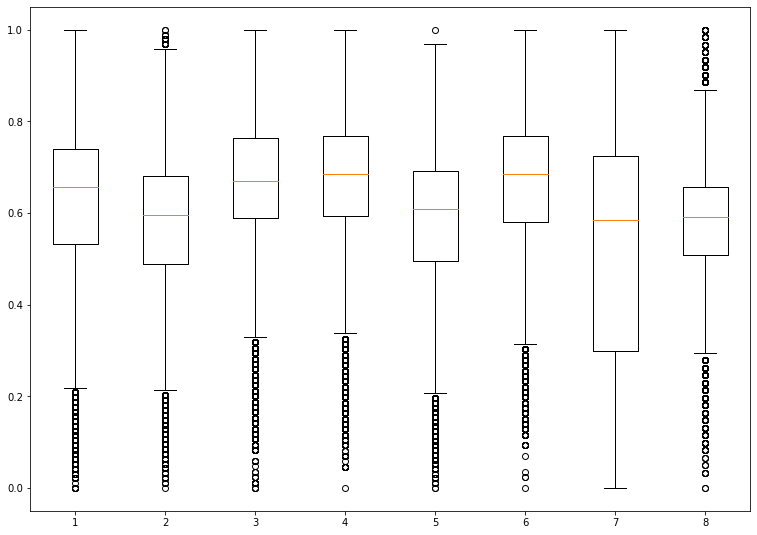

In [17]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(df)
 
# show plot
plt.show()

In [18]:
#Handling outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_97868\3933717571.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\HP\AppData\Local\Temp\ipykernel_97868\3933717571.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\HP\AppData\Local\Temp\ipy

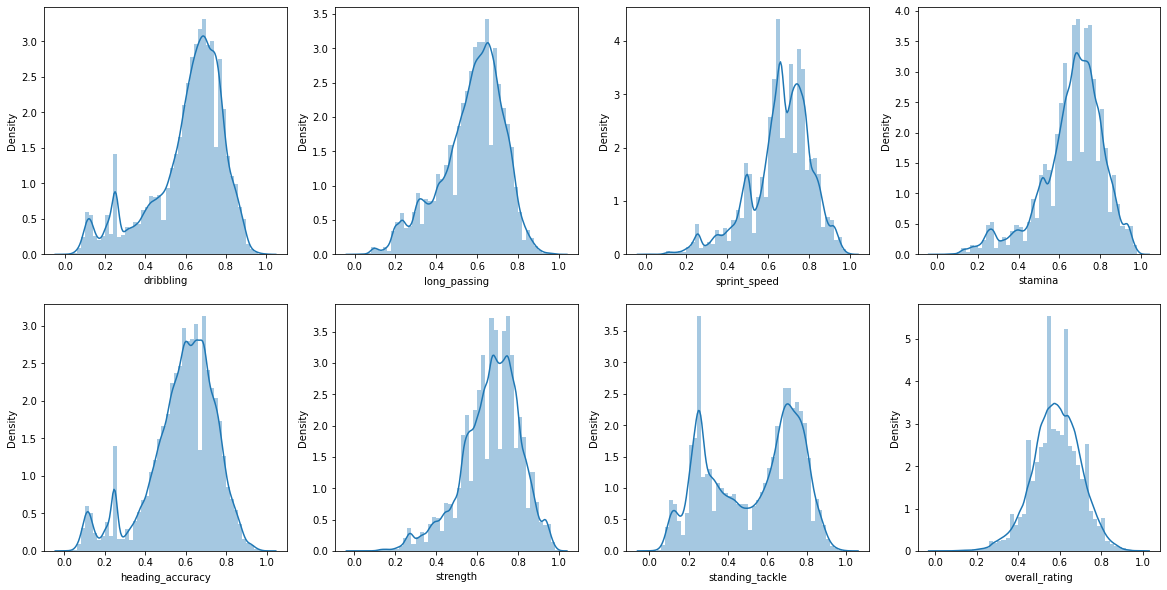

In [19]:
import warnings
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

In [20]:
#Normalizing the data

In [21]:
def normalize(x):
    result = df.copy()
    for feature_name in df.columns:
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - std_value) / (mean_value - std_value)
    return result

In [22]:
df=normalize(df)

In [23]:
df.head()

,dribbling,long_passing,sprint_speed,stamina,heading_accuracy,strength,standing_tackle,overall_rating
0,0.796030,1.174313,0.905744,0.702336,1.345271,1.188931,1.669326,0.942836
1,0.796030,1.174313,0.905744,0.702336,1.345271,1.188931,1.669326,0.942836
2,0.796030,1.174313,0.905744,0.702336,1.345271,1.188931,1.561636,0.768056
3,0.771354,1.149106,0.905744,0.702336,1.320136,1.188931,1.453946,0.733100
4,0.771354,1.149106,0.905744,0.702336,1.320136,1.188931,1.453946,0.733100


C:\Users\HP\AppData\Local\Temp\ipykernel_97868\3933717571.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\HP\AppData\Local\Temp\ipykernel_97868\3933717571.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\HP\AppData\Local\Temp\ipy

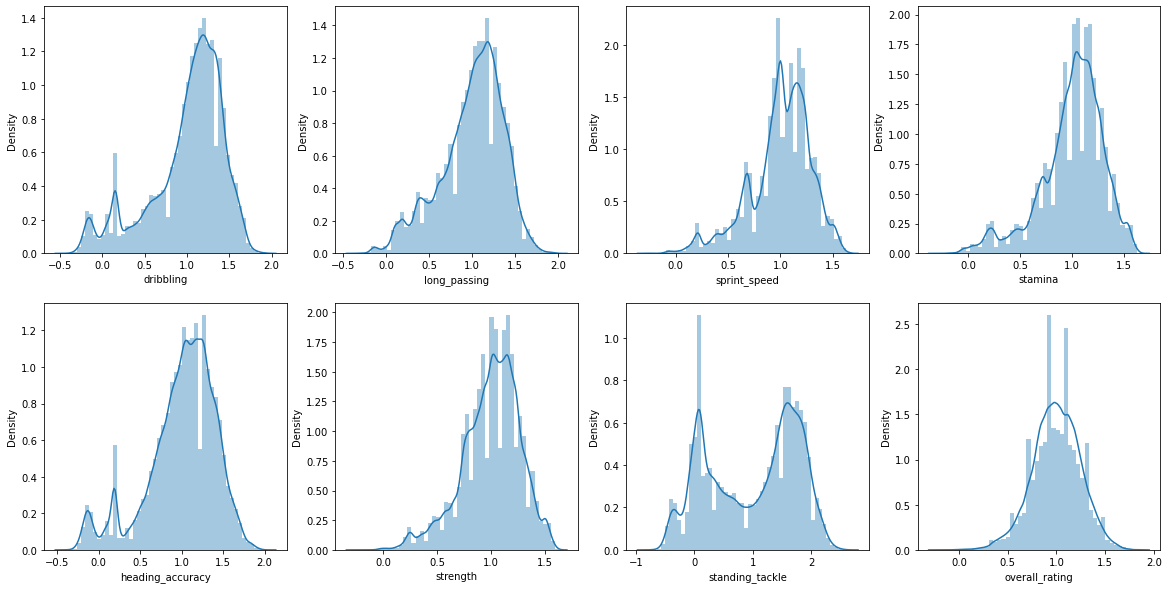

In [24]:
import warnings
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

In [25]:
#handling outliers

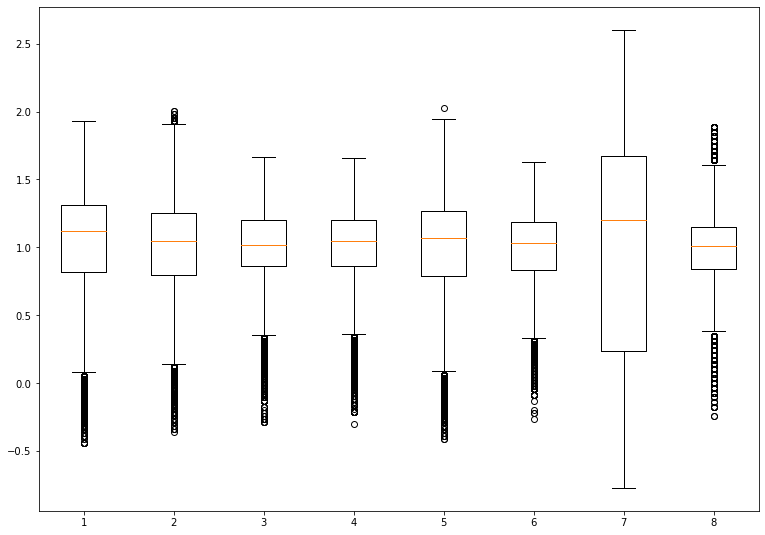

In [26]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(df)
 
# show plot
plt.show()

In [27]:
'dribbling','long_passing','sprint_speed', 'stamina','heading_accuracy','strength','standing_tackle','overall_rating'

('dribbling',
 'long_passing',
 'sprint_speed',
 'stamina',
 'heading_accuracy',
 'strength',
 'standing_tackle',
 'overall_rating')

In [28]:
df=df[df['dribbling'] >0.2]

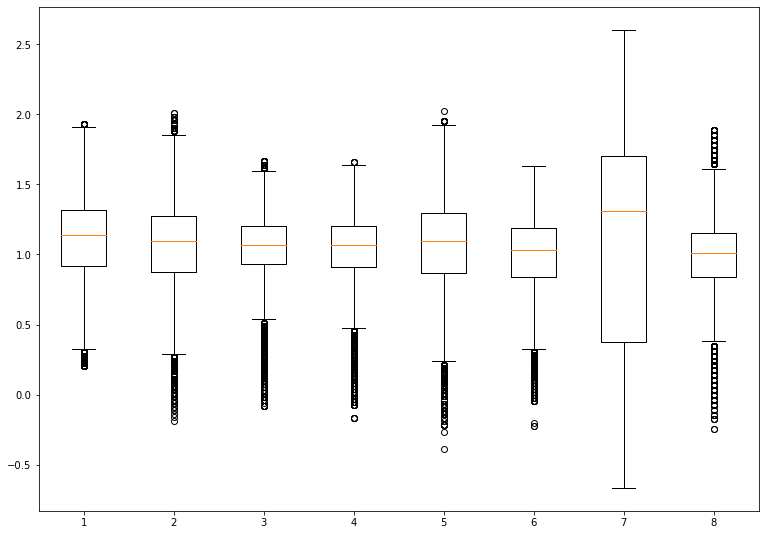

In [29]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(df)
 
# show plot
plt.show()

In [30]:
df.shape

(163775, 8)

In [35]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
x.head()

,dribbling,long_passing,sprint_speed,stamina,heading_accuracy,strength,standing_tackle
0,0.796030,1.174313,0.905744,0.702336,1.345271,1.188931,1.669326
1,0.796030,1.174313,0.905744,0.702336,1.345271,1.188931,1.669326
2,0.796030,1.174313,0.905744,0.702336,1.345271,1.188931,1.561636
3,0.771354,1.149106,0.905744,0.702336,1.320136,1.188931,1.453946
4,0.771354,1.149106,0.905744,0.702336,1.320136,1.188931,1.453946


In [37]:
y.head()

0    0.942836
1    0.942836
2    0.768056
3    0.733100
4    0.733100
Name: overall_rating, dtype: float64

In [76]:
"""x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=56)"""

'x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=56)'

In [77]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 

In [78]:
lr=LinearRegression()

In [79]:
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
print (lr.coef_)

[0.30083262 0.25604472 0.14807755 0.0352116  0.29535407 0.14985684
 0.01914889]


In [81]:
print (lr.intercept_)

-0.28030895349502916


In [82]:
y_pred= lr.predict(x_test)

In [83]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [84]:
print (mean_squared_error(y_test,y_pred))
print (mean_absolute_error(y_test,y_pred))

0.0208784912640117
0.11277552803515223


In [102]:
scores=[]
for i in range(100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=i)
    lr= LinearRegression()
    scores.append(r2_score(y_test,y_pred))    

In [103]:
import numpy as np

In [104]:
np.argmax(scores)

99

In [101]:
scores[np.argmax(scores)]

0.6402516944153991

In [107]:
from sklearn import tree
model= tree.DecisionTreeRegressor()

In [108]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [109]:
model.score(x_test,y_test)

0.9221947650784436